<br>
<p style="text-align: right; font-weight: bold; font-size: 50px"> Chapter. 9</p>
<p style="text-align: right; font-weight: bold; font-size: 25px"> : Unsupervised Learning Techniques</p>

<button type="button" style="float: right;"> 13기 디자인팀 박준성 </button>

---

# 0. 비지도 학습 (Unsupervised Learning)  
"If intelligence was a cake, <U>unsupervised learning would be the cake,</U> supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake."
<p style="text-align: right;"> - Yann LeCun - </p>  
 : 대부분의 데이터는 <b>"<U>Unlabeled</U>"</b> 상태이다. ~ <U>input feature(X)</U>는 있으나 <U>lables(y)</U>는 없다.  
 <br>
<b style="font-size:17px">- Clustering:</b> 유사한 instances를 그룹화시켜 cluster를 만든다.  
&nbsp;&nbsp;&nbsp;ex) dadta analysis, customer segmentation, recommender systems, serach engines, image segmentation, semi-supervised learning, dimensionality redcution ...  
<br>
<b style="font-size:17px">- Anomaly detection:</b> "normal" data의 형태를 파악하고, "abnormal" instances를 발견한다.  
&nbsp;&nbsp;&nbsp;ex) defective items on a production line, a new trend in a time series...  
<br>
<b style="font-size:17px">- Density estimation:</b> 확률과정에서의 *"probability density function (PDF)"* 를 추정한다. 보통, anomaly detection에 사용한다.  
&nbsp;&nbsp;&nbsp;ex) instantces in low-density regions detection  

---

### Clustering에 집중해보자!  
<b> < Objective of Clustering > </b>  
: 군집 내의 분산을 최소화 & 군집 간의 분산을 최대화
유사한 개체들을 묶어서 군집(cluster)을 형성시킨다.  
&nbsp;&nbsp;\* <b>*Cluster(군집)*:</b> groups of similar instances  
<br>
    <b>Clustering</b>은 <U>context,</U> 그리고 사용한 <U>algorithms</U>에 따라서  다른 종류의 cluster를 형성한다.  
<br>  
    <b style="font-size: 16px;"> ※ Classification vs Clustering</b>  
: 유사한 집단으로 묶는 학습방법이라는 공통점을 가지고 있다.<br>  
하지만,<br>  
    <b>Classification</b>은 Label이 있는 data를 나누는 방법으로 <U>지도 학습(Supervised Learning)</U>에 해당하고,  
    <b>Clustering</b>은 Label이 없는 data를 군집 단위로 나누는 것으로, <U>비지도 학습(Unsupervised Learning)</U>에 해당한다.
    
---

# 1. K-Means  
: 주어진 데이터를 k개의 Cluster로 묶는 알고리즘으로, 각 클러스터와의 유클리디안 거리 차이들을 구하고, 그 값들의 분산을 최소화시키는 방식이다.  
<p style="font-size:8px; text-align:right;">(출처: [위키백과](https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98))</p>
## K-Means Algorithm
1. 데이터 집합의 Objects 중에서 설정한 Cluster의 개수인 k개의 Centroid를 임으로 선택한다.  
2. 집합 속의 모든 Objects와 앞서 선택한 Centroid와의 거리를 각각 구하고, 가장 가까운 Centroid가 속하는 Cluster에 Objects를 할당한다.  
3. 같은 Cluster로 할당된 Objects들의 중심점을 찾고, 그 점을 각 Cluster의 새로운 Centroid로 설정한다.
4. Centroid의 변화가 없을 때까지 2-3 과정을 반복한다.

<b> K-Means 알고리즘 단계별로 보기</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

cluster_num = 4

X, y = make_blobs(n_samples = 200, centers = 3, cluster_std= 0.60, random_state=0)

def plot_KMeans(n):
    model = KMeans(n_clusters=cluster_num, init="random", n_init=1, max_iter=n, random_state=8).fit(X)
    c0, c1, c2, c3 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], facecolor='r', s=15)
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], facecolor='green', s=15)
    plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], facecolor='blue', s=15)
    plt.scatter(X[model.labels_ == 3, 0], X[model.labels_ == 3, 1], facecolor='gold', s=15)
    plt.scatter(c0[0], c0[1], c="r", s=200, alpha = 0.5)
    plt.scatter(c1[0], c1[1], c="green", s=200, alpha = 0.5)
    plt.scatter(c2[0], c2[1], c="blue", s=200, alpha = 0.5)
    plt.scatter(c3[0], c3[1], c="gold", s=200, alpha = 0.5)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))

fig = plt.figure(figsize=(8, 8))
plt.subplot(221, facecolor = 'w')
plot_KMeans(1)
plt.subplot(222, facecolor = 'w')
plot_KMeans(2)
plt.subplot(223, facecolor = 'w')
plot_KMeans(3)
plt.subplot(224, facecolor = 'w')
plot_KMeans(4)
plt.tight_layout()
plt.show()

<br>
<br>
<b style="font-size:17px;"> [ 참 고 자 료 ] </b>  

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
import numpy as np

from ipywidgets import interact
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=0.60)
        
    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);
            
    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(centers.shape[0]),
                    s=200, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=50)
            

    def _kmeans_step(iteration=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = iteration // 3

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or iteration % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or iteration % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if iteration % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], 
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if iteration % 3 == 1:
            plt.text(3.8, 9.5, "1. Reassign points to nearest centroid",
                     ha='right', va='top', size=14)
        elif iteration % 3 == 2:
            plt.text(3.8, 9.5, "2. Update centroids to cluster means",
                     ha='right', va='top', size=14)
    
    return interact(_kmeans_step, iteration=np.arange(50+1),
                    n_clusters=np.arange(max_clusters)+1)

plot_kmeans_interactive();

interactive(children=(Dropdown(description='iteration', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50), value=0), Dropdown(description='n_clusters', index=3, options=(1, 2, 3, 4, 5, 6), value=4), Output()), _dom_classes=('widget-interact',))

<br>
<b style="font-size:20px;"> < K-Means in python > </b>  
scikit-learn의 cluster 서브 패키지는 K-Means Clustering을 위한 KMeans Class를 제공한다.  
<br>
    <b>KMeans</b> (n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)  
<br>
    <b>KMeans</b>는 기본적으로 위와 같은 parameter를 받지만, 일반적으로 다음의 parameter로 충분하다.  
    <b>1. n_cluster:</b> Cluster의 갯수  
    <b>2. init:</b> 초기화 세팅방법. "random"이면 무작위, "k-means++"이면 K-Means++ 방식.  
    <b>3. max_iter:</b> 최대 반복 횟수.  
    <b>4. random_state:</b> 시드값.  

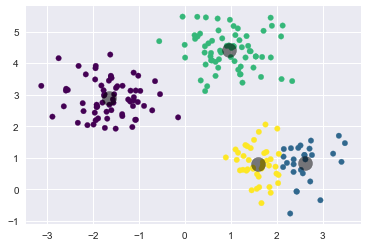

In [3]:
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples = 200, centers = 3, cluster_std= 0.60, random_state=0)

k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<b style="font-size:20px;"> < K-means 성능 평가 > </b>  
    <br>
    <b>K-means</b>는 <U>inertia</U>값으로 Clustering의 성능을 파악한다.  
    <U>inertia</U>는 K-Means Clustering으로 계산된 SSE 값이고, kmeans.inertia_ 을 통해 값을 구할 수 있으며, 작을수록 좋다.  
    kmeans.score(X) 를 통해서도 성능 파악이 가능한데, 이 값은 inertia의 음의 값이다. (일반적으로 클수록 좋다는 *"greater is better"* rule 때문에 사용된다.)

In [4]:
print("inertia = {:5.2f}, score = {:5.2f}".format(kmeans.inertia_, kmeans.score(X)))

inertia = 118.36, score = -118.36


<b style="font-size:20px;"> < Centroid Initialization Methods > </b>  
    <br>
: 기본적으로 K-Means를 실행할 때, 초기 Centroid를 랜덤으로 설정한다.  
    만약, 최종 Cluster의 Centroid 값의 위치를 사전에 대략적으로 파악할 수 있다면, 직접 initial Postion을 np.array를 통해 설정하는 것도 좋은 방법이다.  
    하지만, 초기 Centroid 값이 랜덤으로 설정될 경우에, sub-optimal solution에 도달할 가능성이 있다.  
    Ramdom Sampling에서 가까운 비슷한 instances가 선택되면 결과값이 나쁘게 된다.  
    따라서, 초기 값을 선정할 때, 일정 거리를 떨어뜨리는 <b><U>K-Means++</U></b>를 사용하면 좋다.

<b style="font-size:17px;"> [ K-means++ Algorithm ] </b>  
    <br>
1. 첫 initial point c<sub>1</sub>을 임의로 선택한다.
2. 이후의 initial point c<sub>t</sub>는 이전에 선택한 c<sub>t-1</sub>과의 거리인 d(c<sub>t-1</sub>, c<sub>t</sub>)가 큰 점이 높은 확률로 선택되도록 샘플링 확률 분포를 다음과 같이 조절하고, 이 분포에 따라 하나의 점을 선택한다.  
<img src = "kmeans++.png"></img>
<br>
3. k 개의 initial points를 선택할 때까지 step 2를 반복한다.  
<br>
    샘플링 확률 분포를 사용함에 따라 c<sub>t</sub>는 이전에 선택한 점 c<sub>t-1</sub>과 거리가 먼 점일 가능성이 높다.  
    한 가지 단점이 있다면, c<sub>t-1</sub>과 c<sub>t+1</sub>이 비슷할 수도 있다. (※<U>Ball cut</U>이라는 방법으로 해결 가능.)

In [5]:
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples = 1000, centers = 4, cluster_std= 0.60, random_state=0)

k = 6
kmeans_random = KMeans(n_clusters = k, init = 'random', max_iter = 3)
kmeans_plus = KMeans(n_clusters = k, init = 'k-means++', max_iter = 3)
kmeans_random.fit(X)
kmeans_plus.fit(X)
print()

In [6]:
kmeans_random.inertia_

567.0089094056942

In [7]:
kmeans_plus.inertia_

563.4601480184753

<b style="font-size:20px;"> < Clusters's optimal number: k > </b>  
    <br>
    &nbsp;&nbsp;: Clustering의 성능은 inertia가 작은 값을 가지는 것을 통해 파악할 수 있다.  
    하지만, k가 많아질수록 Centroid가 많아지고, 그에 따라 instances와의 거리가 가까워져서 당연히 inertia값이 작아진다.  
    그런 의미에서 무조건 Cluster 수가 증가한다고 좋다고 할 수는 없다.  
    따라서, 적절한 Cluster의 수, k를 결정하는 것은 중요하다.

<b style="font-size:17px;"> 1. Rule of thumb </b>  
&nbsp;&nbsp;: 가장 간단한 방법으로, 데이터의 수가 n이라고 할 때, 필요한 Cluster의 수는 다음과 같이 계산할 수 있다.  
$$
k ≈ \sqrt{n / 2}
$$

<b style="font-size:17px;"> 2. Elbow Method </b>  
&nbsp;&nbsp;: Cluster의 수를 순차적으로 늘려가면서 결과를 모니터링 한다. 만약 하나의 클러스터를 추가했을 때, 이전보다 훨씬 더 나은 결과를 나타내지 않는다면, 이전의 클러스터의 수를 구하고자 하는 클러스터의 수로 결정한다.  

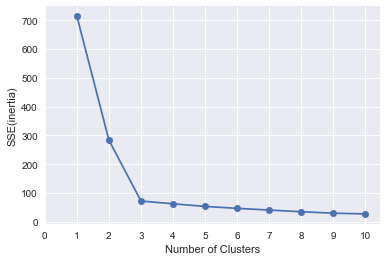

In [8]:
X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std= 0.50, shuffle = True, random_state=0)

def elbow(X):
    sse = []
    for i in range(1,11):
        kmeans_elbow = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
        kmeans_elbow.fit(X)
        sse.append(kmeans_elbow.inertia_)
        
    plt.plot(range(1,11), sse, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE(inertia)')
    plt.xticks(np.arange(11))
    
    plt.show()

elbow(X)

<b style="font-size:17px;"> 3. Silhouette Method </b>  
&nbsp;&nbsp;: Clustering의 품질을 정량적으로 계산해주는 방법이다. *i*번째 데이터 *x(i)*에 대한 실루엣 계수 *s(i)* 값은 아래의 식으로 정의된다.  
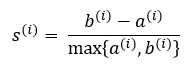
*a(i)*는 Cluster 내부의 데이터 응집도(cohesion)를 나타내는 값으로, *x(i)*와 동일한 Cluster 내의 나머지 데이터들과의 평균거리이다.  
*b(i)*는 Cluster 간의 분리도(separation)를 나타내는 값으로, 데이터 *x(i)*와 가장 가까운 클러스터 내의 모든 데이터들과의 평균거리이다.  
실루엣 계수 값은 1에 가까울 수록 최적화된 Clustering이다.


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


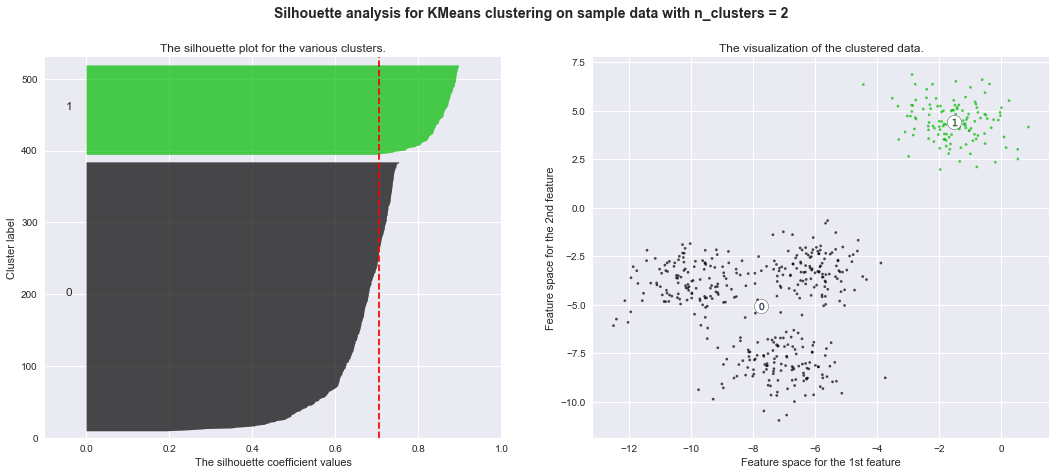

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


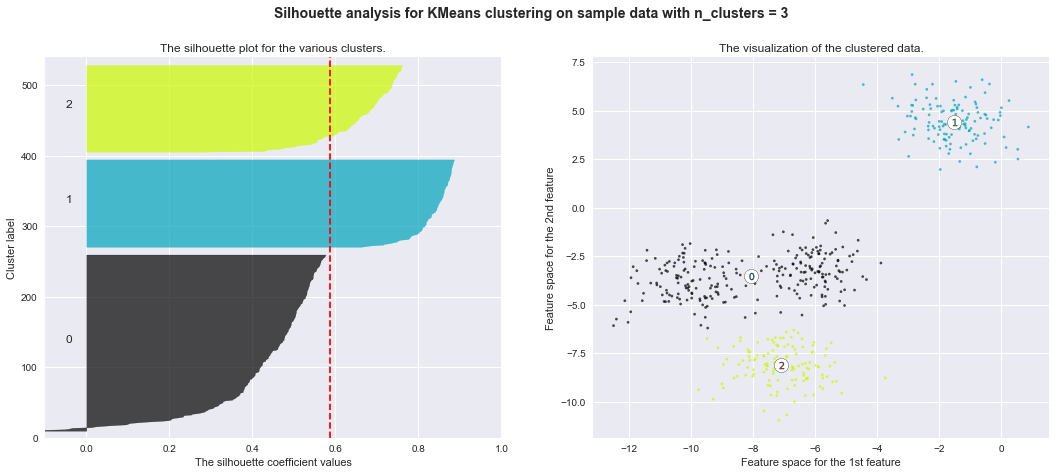

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


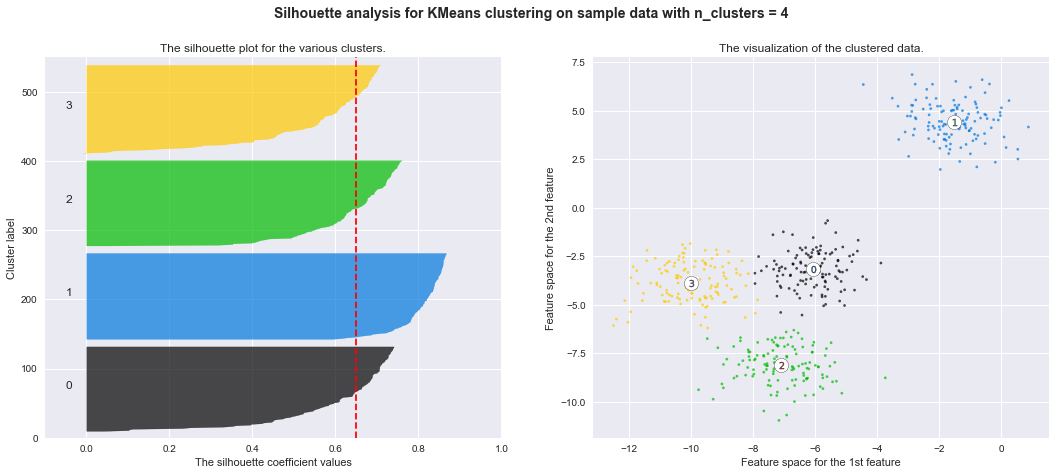

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


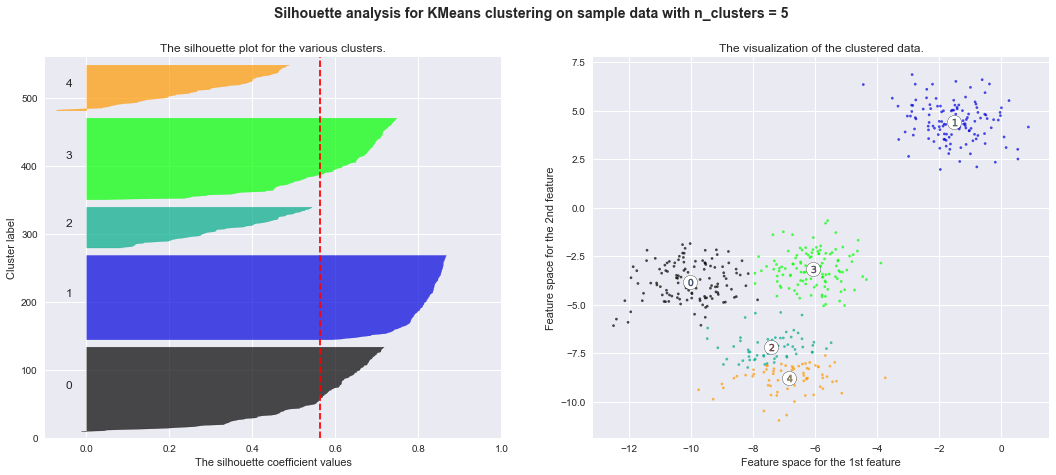

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


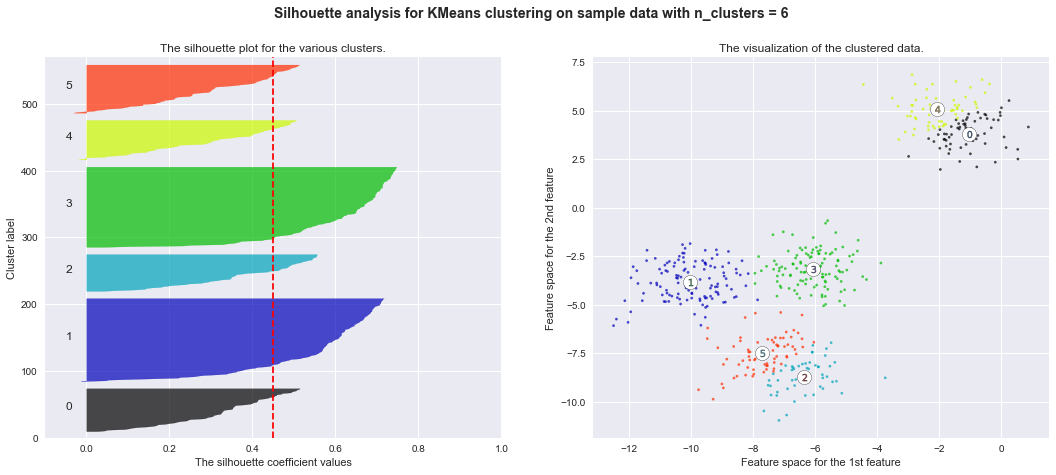

In [9]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1.0,
                  center_box = (-10.0, 10.0), shuffle = True, random_state = 1)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt. subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1]) # 실루엣 계수 범위 지정
    ax1.set_ylim([0, len(X) + (n_clusters+1) * 10]) # 실루엣 클러스터 사이의 공간 만들기
    
    kmeans__ = KMeans(n_clusters = n_clusters, random_state = 10)
    kmeans__labels = kmeans__.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, kmeans__labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, kmeans__labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[kmeans__labels == i]
            
        ith_cluster_silhouette_values.sort()
            
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
            
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # silhouette plots 각각 label 붙이기

        y_lower = y_upper + 10  # 다음 plot을 그리기위해 y_lower 새로 갱신
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x = silhouette_avg, color = "r", linestyle="--") # silhouette score 평균값 그리기
    

    # Cluster 보여주기 (2nd plot)
    colors = cm.nipy_spectral(kmeans__labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    kmeans__centers = kmeans__.cluster_centers_ # cluster labeling
    ax2.scatter(kmeans__centers[:, 0], kmeans__centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k') # centroid circle design

    for i, c in enumerate(kmeans__centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    

Silhouette plot에서 각 클러스터의 꺾이는 부분을 평균과 비교한다.  
또한, 각 클러스터에 속한 개체수를 비교하여 적절하게 분배되었는지 살핀다.  
<br>

<b style="font-size:20px;"> < K-Means in Image Segmentation > </b>  
    <br>
    : Image Segmentation은 image를 여러 segment로 나누는 과정이다.  
    같거나 비슷한 pixel들을 묶어서 하나의 클러스터로 지정해준다.  
    Image Segmentation의 간단한 Color Semgentation은 K-Means Clustering으로도 가능하다. (보통 CNN으로 처리)

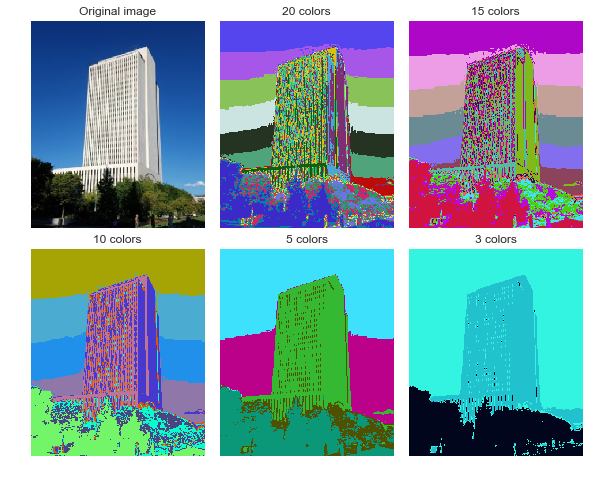

In [10]:
img = plt.imread('img_seg_1.jpg')

X = img.reshape(-1,3)

segmented_imgs = []
n_colors = (20, 15, 10, 5, 3)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(img.shape))
    
    
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(img)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
plt.show()

<b style="font-size:20px;"> < K-Means in Preprocessing & Semi-Supervised Learning > </b>  
    <br>
    : Clustering을 사용하여 차원축소를 통해 전처리가 가능하다.  
    또한, 일부 data가 Labeld 되어있고, Unlabeled data가 많은 경우에 Clustering을 사용하여 data propagation이 가능하다.  
    자세한 설명이나, 해당 과정에 대한 코드는 생략.  
    <br>

<b style="font-size:20px;"> < Limits of K-Means > </b>  
    <br>
1. Sub-optimal solution을 피하기 위해 여러번 시행하여야 한다.
2. Cluster의 갯수를 지정하여야 한다. (귀찮고 번거로움)  
3. Outlier가 있는 경우에 취약하다. (유클리디안 거리 기준이기 때문)  
4. Varying sizes, Different densities, Non-spherical shapes의 경우에 성능이 좋지 않다.  
<br>
    <b>K-Means의 한계점 중에서 4번의 예시를 살펴보자!</b>

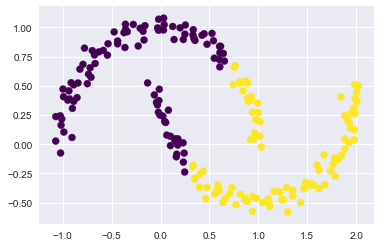

In [11]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

---

# 2. DBSCAN
: Density-Based Spatial Clustering of Applications with Noise  
: 밀도 기반의 클러스터링으로 점이 세밀하게 몰려 있는 것을 기준으로 Clustering을 하는 방법이다.  
어느 한 점을 기준으로 일정 반경 이내의 점들을 하나의 Cluster로 인식한다.  
## DBSCAN Algorithm
1. 한 점 P를 기준으로 ε(eps) 반경 내에 점이 지정한 개수(minPts) 이상이 있으면 해당 점 P를 Core Point라고 한다.  
2. 앞의 점 P를 Core Point로 하는 Cluster에 속하는 P'중에서 ε(eps) 반경 내에 점이 지정한 개수(minPts)보다 작으면 Border Point라고 한다.  
3. 이 외에 ε(eps) 반경을 만족하는 범위에 어떠한 점도 포함하지 않는 점 P"을 Noise Point라고 한다.  
4. Core Point와 Border Point와 같이 ε(eps) 반경 내에 서로의 군집에 Points가 속하는 경우에 하나의 Cluster로 할당한다.  

<b style="font-size:20px;"> < DBSCAN Advantages > </b>  
    <br>
1. Cluster 개수를 지정하지 않아도 알고리즘을 통해 적절한 Cluster를 찾아준다.  
2. K-Means에서 할 수 없었던, 불특정한 모양 분포를 Clustering 할 수 있다. (Density-based)  
3. Outlier를 Noise Point로 분류하여 Clstering 성능을 좋게 한다.  
    

<br>
<b style="font-size:20px;"> < DBSCAN in python > </b>  
scikit-learn의 cluster 서브 패키지는 DBSCAN Clustering을 위한 DBSCAN Class를 제공한다.  
<br>
    <b>DBSCAN</b> (eps=0.5, min_samples=5, metric=’euclidean’, metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=None)  
<br>
    <b>DBSCAN</b>은 기본적으로 위와 같은 parameter를 받지만, 일반적으로 다음의 parameter로 충분하다.  
    <b>1. eps:</b> ε(epsilon)으로 samples 사이의 maximum distance로 Core Point를 지정하기 위한 최대 반경.  
    <b>2. min_samples:</b> Core Point를 기준으로 eps 반경 안에 속하는 samples의 개수.  

In [12]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = .05, random_state = 0)

<br>
<b>DBSCAN</b>을 통해 데이터를 fit 시키고, 결과를 확인해보자!  
<br>
<b>.labels_:</b> sample이 지정된 Cluster를 확인. (labeling 이 '-1'로 된 것은 알고리즘에서 anomaly로 지정된 것이다.)  
<b>.core_sample\_indices\_:</b> core point로 지정된 것들의 index를 확인. (len()으로 core points 총 개수 확인 가능)  
<b>.components_:</b> core point의 좌표 확인.  
<br>
※ 10개씩만 확인해보자!

In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.08, min_samples = 5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.08, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [14]:
dbscan.labels_[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [15]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [16]:
dbscan.core_sample_indices_[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [17]:
dbscan.components_[:10]

array([[ 2.02100097,  0.49017924],
       [ 1.6782009 , -0.20198687],
       [-0.28224484,  0.85878484],
       [-0.02143996,  0.17628146],
       [ 0.50484202, -0.3910431 ],
       [ 1.96953895,  0.36005521],
       [ 0.95659588,  0.2536649 ],
       [ 0.0948788 ,  0.98337847],
       [-0.4416603 ,  0.87203428],
       [ 0.70751638, -0.5126737 ]])

<br>
<b>DBSCAN</b>을 적용시킨 scatter plot을 그려보자!

Text(0.5,1,'eps = 0.08, min_samples = 5')

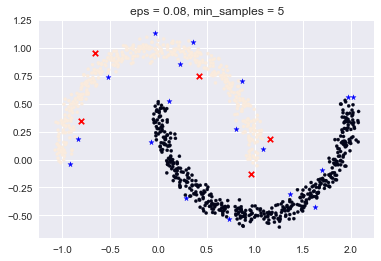

In [18]:
core_mask = np.zeros_like(dbscan.labels_, dtype = bool)
core_mask[dbscan.core_sample_indices_] = True
noise_mask = dbscan.labels_ == -1
border_mask = ~(core_mask | noise_mask)

cores = dbscan.components_
noise = X[noise_mask]
border = X[border_mask]

plt.scatter(cores[:,0], cores[:,1], s = 10, c = dbscan.labels_[core_mask])
plt.scatter(noise[:,0], noise[:,1], c = 'r', marker = 'x', s= 30)
plt.scatter(border[:,0], border[:,1], c = 'b', marker = '*', s = 30)

plt.title("eps = 0.08, min_samples = 5")

<br>
<b>DBSCAN</b>에는 predict() 기능이 없다.  
따라서, 새로운 데이터에 대해서 Cluster 예측이 불가능하다.  
예측을 위해서 <b>KNeighborsClassifier</b>를 사용하면 된다.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [20]:
# 새로운 데이터 샘플을 임의로 설정

X_new = np.array([[-0.5,0], [0,0.5], [1, -0.1], [2,1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [21]:
knn.predict_proba(X_new)

array([[0.2 , 0.8 ],
       [1.  , 0.  ],
       [0.18, 0.82],
       [1.  , 0.  ]])

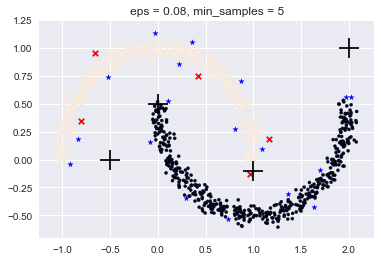

In [22]:
core_mask = np.zeros_like(dbscan.labels_, dtype = bool)
core_mask[dbscan.core_sample_indices_] = True
noise_mask = dbscan.labels_ == -1
border_mask = ~(core_mask | noise_mask)

cores = dbscan.components_
noise = X[noise_mask]
border = X[border_mask]

plt.scatter(cores[:,0], cores[:,1], s = 10, c = dbscan.labels_[core_mask])
plt.scatter(noise[:,0], noise[:,1], c = 'r', marker = 'x', s= 30)
plt.scatter(border[:,0], border[:,1], c = 'b', marker = '*', s = 30)

plt.title("eps = 0.08, min_samples = 5")

# 새로 생성한 데이터를 추가
plt.scatter(X_new[:,0], X_new[:,1], c= "k", marker = "+", s = 400, zorder = 999)

In [23]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

<br>
<b style="font-size:20px;"> < Limits of DBSCAN > </b>  
    <br>
1. 입력하는 parameter 값에 따라, 다른 Clustering 결과를 보인다.  
2. 데이터 특성을 모를 경우에 hyper-parameter를 설정하기 어렵다.  
3. Computational Complexity가 Linearithmic Time( O(m log m) )을 따르는데, eps 값이 커짐에 따라 Quadratic Time( O(m<sup>2</sup>) )을 따르게 되어 복잡도가 증가한다.
---    

# 3. GMM (Gaussian Mixture Model)
: Mixture Model이란, 전체 분포에서 하위 분포가 존재한다고 가정하는 모델이다.  
데이터가 모수를 가지는 여러 개의 분포로부터 합쳐진 형태라는 것이다.  
즉, <b>Gaussian Mixture Model</b>은 합쳐진 여러 개의 분포가 Gaussian Distribution의 형태인 것을 말한다.  
## GMM Algorithm
일반적으로 <b>GMM</b>은 주어진 데이터에 대해 <b>EM(Expectation-Maximization) Algorithm</b>을 적용하여 GMM을 구성하는 세 parameter <b>π, μ, Σ</b>를 추정한다.  
<br>
첫 번째, <b>π</b>는 mixing coefficient로, 데이터를 구성하는 여러 정규분포 중에서 확률적으로 어느 분포에 속하는지를 나타내는 Weight 값이다. 이 parameter를 잠재변수(latent variable)에 해당하고 다음 조건을 만족해야한다. 
<img src = "pie_condition.png"></img>
<br>
두 번째, 정규분포의 두 개의 parameter(<b>μ, Σ</b>)는 각 정규분포의 평균과 표준편차이다.  
<br>
<b>EM Algorithm</b>은 크게 <b>E-step</b>과 <b>M-Step</b>으로 나누어지고, 이 두 과정의 반복으로 이루어진다.
1. 임의의 값으로 세 종류의 <b>parameter π, μ, Σ</b>를 초기화한다.  
2. <b>E-Step</b>  
: 주어진 parameter를 사용하여 <b>사후확률 Responsibility γ(Z<sub>nk</sub>)</b>을 계산한다.  
<img src = "gmm_responsibility.png"></img>
3. <b>M-Step</b>  
: E-Step에서 얻은 Responsibility를 이용하여 <b>parameter π, μ, Σ</b>를 추정한다.  
어떤 모델에서 데이터가 생성되었을 확률을 나타내는 Likelihood function에 log를 취한 Log-Likelihood는 다음과 같다.  
<img src = "gmm_loglikelihood.png"></img>

    Log-Likelihood Function을 최대화시키기 위해 식을 각 parameter로 편미분하여 0 이 되도록 하면 세 종류의 식이 정리되고,  
    아래의 추정식을 통해 parameter 추정이 가능하다.  
<img src = "gmm_mu.png"></img>
<p style = "text-align: center; font-weight: bold; font-size: 10pt">\[ μ 추정식 \]</p>  
<img src = "gmm_sigma.png"></img>
<p style = "text-align: center; font-weight: bold; font-size: 10pt">\[ Σ 추정식 \]</p>  
<img src = "gmm_pie.png"></img>
<p style = "text-align: center; font-weight: bold; font-size: 10pt">\[ π 추정식 \]</p>  
<img src = "gmm_n.png"></img>
<p style = "text-align: center; font-weight: bold; font-size: 10pt">\[ N<sub>k</sub> 추정식 \]</p>  
4. <b>Likelihood Function Test</b>  
: parameter 또는 Likelihood Function의 값의 Converge 상태를 확인하고, Converge 하지 않으면 E-Step으로 돌아가서 반복한다.

<br>
<b style="font-size:20px;"> < GMM in python > </b>  
scikit-learn의 mixture 서브 패키지는 Gaussian Mixture Model을 위한 GaussianMixture Class를 제공한다.  
    <br>
※ 기존에 있던 GMM은 사라지고, GaussianMixture로 변경 (GMM을 실행하면 alert와 함께 자동으로 GaussianMixture를 사용한다.)  
    <b>from</b> sklearn.mixture <b>import</b> <u>GMM</u>  
    -> <b>from</b> sklearn.mixture <b>import</b> <u>GaussianMixture</u>  
<br>
    <b>GaussianMixture</b> (n_components=1, covariance_type=’full’, tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params=’kmeans’, weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)  
<br>
    <b>GaussianMixture</b>는 기본적으로 위와 같은 parameter를 받지만, 일반적으로 다음의 parameter로 충분하다.  
    <b>1. n_components:</b> 혼합 분포의 수  
    <b>2. covariance_type:</b> 사용할 분산의 형태. "full"은 default값으로 분산 행렬이 각자의 방식(모두 다른 모양), "tied"면 모두 같은 분산행렬(같은 타원체 모양), "diag"는 대각행렬 형태의 분산행렬(타원체의 축이 x, y축과 평행), "spherical"이면 covariance가 아닌 single variance(모두 구체 형태)  
    <b>3. max_iter:</b> EM Algorithm 반복 횟수.  
    <b>4. n_init:</b> 랜덤 시작 횟수.  

<br>
<b>GMM</b>의 원리와 사용방법을 python code를 통해 이해해보자.  
<br>
우선, 랜덤으로 세 종류의 정규분포 형태를 생성한다.  
- 정규분포 1: mean = -0.5, sd = 0.2, data count = 2000  
- 정규분포 2: mean = -0.1, sd = 0.07, data count = 5000  
- 정규분포 3: mean =  0.2, sd = 0.13, data count = 10000  
<br>
세 변수에 정규분포를 하나씩 저장하자!

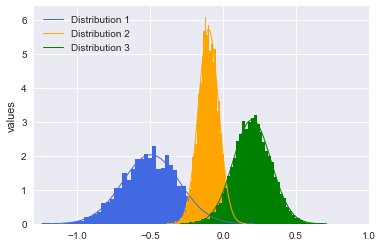

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

dist1 = np.random.normal(-0.5, 0.2, 2000)
dist2 = np.random.normal(-0.1, 0.07, 5000)
dist3 = np.random.normal(0.2, 0.13, 10000)

for dist, colors in [(dist1, 'royalblue'), (dist2, 'orange'), (dist3, 'green')]:
    counts, bins, patches = plt.hist(dist, 50, normed = True, color = colors)
    plt.plot(bins, 1/(dist.std() * np.sqrt(2 * np.pi)) * np.exp(-(bins - dist.mean())**2 / (2 * dist.std()**2)), linewidth = 1, color = colors)

plt.xlim(-1.3, 1.0)
plt.ylabel('values')
plt.legend(['Distribution 1', 'Distribution 2', 'Distribution 3'], loc = 'upper left')
plt.show()

랜덤으로 생성한 세 종류의 정규분포를 지정한 빈도수 기준으로 히스토그램을 그린다.

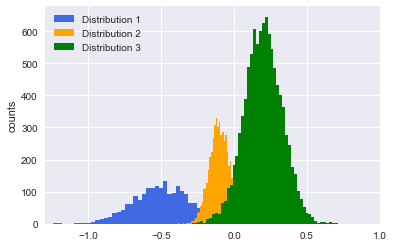

In [25]:
for dist, colors in [(dist1, 'royalblue'), (dist2, 'orange'), (dist3, 'green')]:
    counts, bins, patches = plt.hist(dist, 50, color = colors)

plt.xlim(-1.3, 1.0)
plt.ylabel('counts')
plt.legend(['Distribution 1', 'Distribution 2', 'Distribution 3'], loc = 'upper left')
plt.show()

세 종류의 정규분포를 하나의 데이터프레임에 넣어서 합쳐보면 다음과 같다.

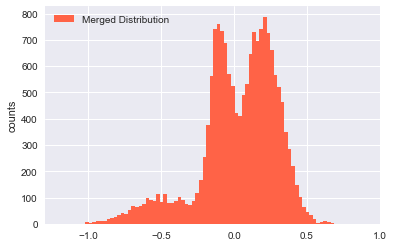

In [26]:
df1 = pd.DataFrame(dist1)
df2 = pd.DataFrame(dist2)
df3 = pd.DataFrame(dist3)
df_merged = pd.concat([df1, df2, df3], ignore_index = True)

df_merged_weights = np.ones_like(df_merged.values)

plt.hist(df_merged.values, bins = 80, weights = df_merged_weights, color = 'tomato')

plt.xlim(-1.3, 1.0)
plt.ylabel('counts')
plt.legend(['Merged Distribution'], loc = "upper left")
plt.show()

우리가 실제로 마주하게 되는 데이터는 모양은 위와 같다.  
위 분포를 정규분포들의 합쳐진 모습으로 생각하기 어렵다.  
<b>GMM</b>은 우선적으로 데이터를 정규분포의 합으로 가정하고 Clustering을 진행한다.

<br>
<b>DBSCAN</b>을 통해 데이터를 fit 시키고, 결과를 확인해보자!  
<br>
<b>.weights\_:</b> sample이 지정된 Cluster를 확인. (labeling 이 '-1'로 된 것은 알고리즘에서 anomaly로 지정된 것이다.)  
<b>.means\_:</b> core point로 지정된 것들의 index를 확인. (len()으로 core points 총 개수 확인 가능)  
<b>.covariances\_:</b> core point의 좌표 확인.  
<b>.converged\_:</b> algorithm이 수렴 했는지 확인.  
<b>.n\_iter\_:</b> 반복 시행 횟수 확인.  
<b>.predict(X):</b> 각 data의 Clustering Label (hard clustering).  
<b>.predict_proba(X):</b> 각 data의 Clustering 확률 (soft clustering).  
<b>.sample(number):</b> 'number' 수만큼 sample 추출.  
<b>.score_samples(X):</b> sample PDF의 log값  
<br>


In [27]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3, n_init = 10)
gmm.fit(df_merged)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [28]:
gmm.weights_

array([0.37536684, 0.52001313, 0.10462003])

In [29]:
gmm.means_

array([[-0.0826573 ],
       [ 0.2232395 ],
       [-0.52979241]])

In [30]:
gmm.covariances_

array([[[0.00811257]],

       [[0.0133122 ]],

       [[0.03068592]]])

In [31]:
gmm.converged_

True

In [32]:
gmm.n_iter_

3

In [33]:
gmm.predict(df_merged)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [34]:
x_new, y_new = gmm.sample(5)

In [35]:
# sample의 x값
x_new

array([[-0.06291149],
       [ 0.03767941],
       [-0.03357313],
       [ 0.33613337],
       [-0.41974689]])

In [36]:
# sample의 y값으로 cluster label
y_new

array([0, 0, 0, 1, 2])

In [37]:
# 잘못된 결과값... 원인이 뭔지 못찾겠음
gmm.score_samples(df_merged)

array([-0.21455273, -1.34426849, -1.51535266, ...,  0.58696142,
        0.57093925, -1.11939469])

<br>
<b>GMM</b>을 적용시킨 결과를 plot을 통해 기존의 것과 비교해보자.  

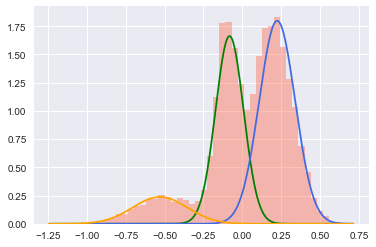

In [38]:
import scipy.stats as stats

weights = gmm.weights_
means = gmm.means_
covars = gmm.covariances_

# df_merged를 dataframe에서 array로 변환
arr_merged = df_merged.values.flatten()

# 데이터 범위 및 개수
xx = np.linspace(min(arr_merged),max(arr_merged),17000)

pdf_1 = stats.norm(loc = means[0], scale = np.sqrt(covars[0]))
pdf_2 = stats.norm(loc = means[1], scale = np.sqrt(covars[1]))
pdf_3 = stats.norm(loc = means[2], scale = np.sqrt(covars[2]))

n, bins, patches = plt.hist(df_merged.values, bins = 50, normed=True, facecolor='tomato', alpha = .4)
plt.plot(xx,weights[0]*pdf_1.pdf(xx)[0], c='green')
plt.plot(xx,weights[1]*pdf_2.pdf(xx)[0], c='royalblue')
plt.plot(xx,weights[2]*pdf_3.pdf(xx)[0], c='orange')

plt.show()

정확하진 않지만, 3개의 정규분포가 적절하게 추정된 것을 알 수 있다.  
<br>  
2차원 데이터를 통해서 <b>GMM</b>을 시행해보자.

In [67]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [40]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init = 10, random_state = 42)
gm.fit(X)

print("Weights:\n", gm.weights_)
print("\nMeans:\n", gm.means_)
print("\nCovariances:\n", gm.covariances_)
print("\nConverged?:\n", gm.converged_)
print("\nn_iter_:\n", gm.n_iter_)

Weights:
 [0.20965228 0.4000662  0.39028152]

Means:
 [[ 3.39909717  1.05933727]
 [-1.40763984  1.42710194]
 [ 0.05135313  0.07524095]]

Covariances:
 [[[ 1.14807234 -0.03270354]
  [-0.03270354  0.95496237]]

 [[ 0.63478101  0.72969804]
  [ 0.72969804  1.1609872 ]]

 [[ 0.68809572  0.79608475]
  [ 0.79608475  1.21234145]]]

Converged?:
 True

n_iter_:
 3


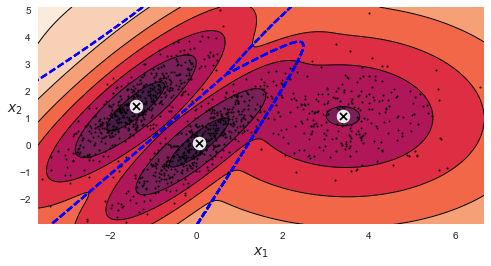

In [79]:
from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)
    
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='b', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=4)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
        
plt.figure(figsize = (8,4))
plot_gaussian_mixture(gm, X)
plt.show()

<b style="font-size:20px;"> < GMM in Anomaly Detection > </b>  
    <br>
    : GMM을 사용하면 간단하게 Anomaly Detection이 가능하다.  
    낮은 density를 가지는 구역에 위치한 instances를 anomaly로 지정한다.  
    <br>

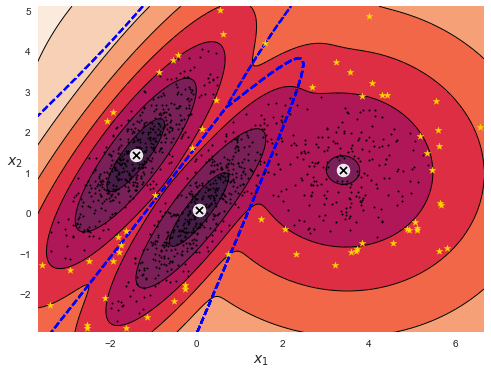

In [83]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 5)
anomalies = X[(densities < density_threshold)]

plt.figure(figsize = (8,6))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color = 'gold', marker = '*', s= 50, zorder =999)
plt.show()

<b style="font-size:20px;"> < Clusters's optimal number: k > </b>  
    <br>
    : K-Means와는 달리, <b>GMM</b>에서는 Cluster의 모양이 제각각이기 때문에 inertia나 silhouette score를 사용할 수 없다.  
    따라서, <b>GMM</b>에서는 theoretical information criterion인 BIC(Bayesian Information Criterion)이나 AIC(Akaike Information Criterion)을 사용한다.  
<p style = "text-align: center; font-size: 17px;">${BIC} = {\log(m)p - 2\log({\hat L})}$  
    ${AIC} = 2p - 2\log(\hat L)$</p>  
    <b>m</b>: number of instances  
    <b>p</b>: number of parameters  
    <b>$\hat L$</b>: maximized value of likelihood function  
    <br>
    대부분의 경우에 BIC와 AIC는 같은 모델을 선택하지만, 차이가 있는 경우에 보통 BIC는 더 간단한 모델을 선택하는 경향이 있다.  
    대신에 data를 잘 적합시키지 못하는 경우가 있다.(Especially, Large Dataset)

In [43]:
gm.bic(X)

8189.74345832983

In [44]:
gm.aic(X)

8102.518178214792

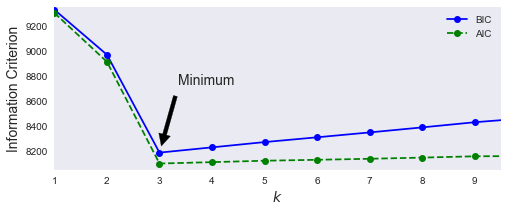

In [45]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.grid(False)

plt.show()

BIC와 AIC가 최소인 부분에서의 k를 선택하는 것이 가장 좋다.  
<br>

<b style="font-size:20px;"> < BGM: Bayesian Gaussian Mixture > </b>  
    <br>
    : BGM은 불필요한 Cluster의 weight를 0 또는 0에 가까운 값을 할당하여 제거해준다.  
    이상적인 Cluster의 수보다 큰 값을 n_components 값으로 할당하면 알아서 최적의 개수를 찾아주는 모델이다.  
    <br>
    scikit-learn의 mixture 서브 패키지는 Bayesian Gaussian Mixture Model을 위한 BayesianGaussianMixture Class를 제공한다.  
    <br>
    <b>BayesianGaussianMixture</b> (n_components=1, covariance_type=’full’, tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params=’kmeans’, weight_concentration_prior_type=’dirichlet_process’, weight_concentration_prior=None, mean_precision_prior=None, mean_prior=None, degrees_of_freedom_prior=None, covariance_prior=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)  
<br>
    <b>BayesianGaussianMixture</b>는 기본적으로 위와 같은 parameter를 받지만, 일반적으로 다음의 parameter로 충분하다.  
    <b>1. n_components:</b> 혼합 분포의 수. BGM은 최적의 k 수를 찾아주므로 설정한 값보다 적은 수의 Cluster를 얻게 된다.    
    <b>2. covariance_type:</b> 사용할 분산의 형태. (GMM과 같다.)  
    <b>3. max_iter:</b> 반복 횟수.  
    <b>4. n_init:</b> 랜덤 시작 횟수.  
    <b>5. weight_concentration_prior:</b> Cluster's Concentration. (0.01~1000)  

In [73]:
from sklearn.datasets import make_blobs
from sklearn.mixture import BayesianGaussianMixture
import numpy as np

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

bgm = BayesianGaussianMixture(n_components = 10, n_init = 10, random_state = 42)
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=10, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

In [74]:
bgm.weights_

array([3.95095317e-01, 2.05162685e-01, 3.99662331e-01, 7.24246329e-05,
       6.58404122e-06, 5.98549202e-07, 5.44135638e-08, 4.94668762e-09,
       4.49698874e-10, 4.08817159e-11])

In [76]:
np.round(bgm.weights_, 3)

array([0.395, 0.205, 0.4  , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

소수점 3째자리 반올림을 통해 작은 weight 값을 0으로 만들었다.  
결과적으로, 3 개의 Cluster가 선택된 것을 알 수 있다.  

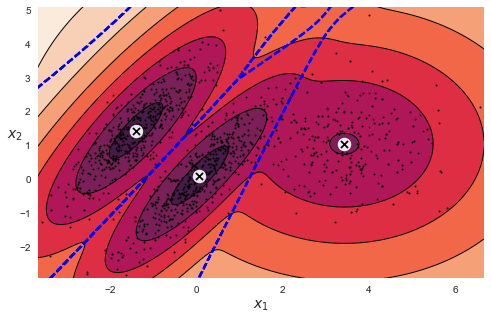

In [84]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

<br>
<b style="font-size:20px;"> < Limits of GMM > </b>  
    <br>
1. Sub-optimal solution을 피하기 위해 여러번 시행하여야 한다.
2. Gaussian Distribution을 가정한다.  
3. Non-spherical shapes의 경우에 성능이 좋지 않다.  
<br>
    <b>K-Means의 한계점으로 사용했던 예시 moon shape를 통해 GMM의 3번 한계점을 살펴보자!</b>

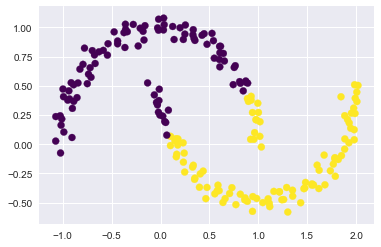

In [65]:
from sklearn.datasets import make_moons
gm_X, gm_y = make_moons(200, noise=.05, random_state=0)

gm_1 = GaussianMixture(n_components = 2, random_state=0)
gm_1.fit(gm_X)

plt.scatter(gm_X[:,0], gm_X[:,1], c = gm_1.fit(gm_X).predict(gm_X), cmap = 'viridis')
plt.show()

---

# 4. Mean-shift
: Mean Shift란, 평균을 따라 이동시킨다는 뜻이다.  
어떤 데이터 분포의 peak 또는 center를 찾는 방법으로, 해당 중심을 기준으로 한 circle을 주변에서 가장 데이터가 밀집한 방향으로 점점 이동시켜 수렴하는 곳에서 Cluster를 결정한다.  
Hill Climbing Serach의 하나로, Gradient Descent Search, Blind Search, Greedy Search 등과 유사하다.  
## Mean-shift Algorithm
1. instance를 중심으로 일정 반경(r)을 가지는 circle을 만들고, circle 안에 들어가는 모든 instance를 구한다.  
2. circle 안에 있는 instances의 평균을 구하고 해당 지점으로 중심을 옮긴다.  
3. 1~2 과정을 중심의 변화가 더 이상 일어나지 않게 수렴할 때까지 반복한다.  
<br>
<b>※ Mean Shift를 이용한 영상 이동체 추적</b>  
: 영상에서 추적하고자 하는 대상 물체에 대한 색상 히스토그램(histogram)과 현재 입력 영상의 히스토그램을 비교해서 가장 유사한 히스토그램을 갖는 영역을 찾는 것이다.  
Histogram Backprojection과 Mean Shift를 결합한 방법을 사용하여 가장 유사한 히스토그램 영역을 찾는다.  
영상에서 추적할 대상의 영역이 정해지면 히스토그램을 구하여 객체 모델로 저장한다.  이후에 입력 영상이 들어오면 Histogram Backprojection을 통해 영상의 픽셀값들을 확률값으로 변경시킨다.  
이렇게 구한 확률값의 분포에 대해 Mean Shift를 적용하여 물체의 위치를 찾는다.  
하지만, 추적에 대한 좋은 성능을 기대하기는 어렵고, 추적하고자 하는 물체의 색과 배경의 색이 유사하면 추적이 실패하기 쉽다.  
<br>
<b>Mean-Shift 이미지 추적 예시: [YouTube영상](https://youtu.be/RG5uV_h50b0)</b>

---

<b>Reference:</b> <u>Hands on Machine Learning</u>